In [1]:
import numpy as np
from scipy.stats import beta as bt
import matplotlib.pyplot as plt
from numpy import genfromtxt
plt.style.use('ggplot')

In [26]:
# Functions to implement thompson and regret, alongside plotting both

def Thompson(t_len, k_len, arms, priors, seed=5):
    np.random.seed(seed)
    culm_chosen = []
    alpha = [priors[0] for k in range(k_len)]
    beta = [priors[1] for k in range(k_len)]
    for t in range(t_len):
        samples = [np.random.beta(alpha[k],beta[k]) for k in range(k_len)] # Collect samples
        best = np.argmax(samples) # Choose best
        r = np.random.random()<arms[best] # observe r_t (reward and for some reason 'True' counts as the value 1)
        # Update the state of the winning arm 
        alpha[best] += r
        beta[best] += 1-r
        # Append best
        culm_chosen.append(best)
    return alpha,beta,culm_chosen

def plot_res(a,b, t_len):
    x=np.linspace(0,1,1000)
    for  i in range(2):
        y = bt(a[i], b[i])
        plt.plot(x,y.pdf(x),  label=f'Posterior: Arm {i+1}, prob {arms[i]}')
    plt.title(f'T={t_len} rounds')
    plt.xlabel('Prob.')
    plt.legend()
    plt.show()

# Takes arguments of the arm probabilities, chosen choices at each round (i.e. the best arm index that was chosen),
# And the number of rounds
def get_regret(arms, culm_chosen, t_len):
    # Keep empty list to update
    regret=[]
    # Range over length of T
    for T in range(1,t_len+1):
        # Iterate over arms (i know the best arm goes to 0 but i thought id generalise it anyway)
        armval = []
        for idx, arm in enumerate(arms):
            # use the regret rule from notes, take mean of the indicator choices up to the round T
            armval.append((arms[np.argmax(arms)]-arm)*(np.mean([culm_chosen[i]==idx for i in range(0,T)])))
        # Add arm 1 and arm 2 values (i know this is pointless since the best arm is 0 so only counts for non optimal arm)
        regret.append(armval[0]+armval[1])
    return regret
def plot_reg(regret,ucb,t_len):
    plt.plot(np.cumsum(regret), label='Thompson regret')
    plt.plot(ucb, label='UCB1 regret')
    plt.plot(np.linspace(1,t_len), np.log(np.linspace(1,t_len)), label='log', color='orange')
    plt.legend()
    plt.title(f'Regret T={t_len}')
    plt.show()

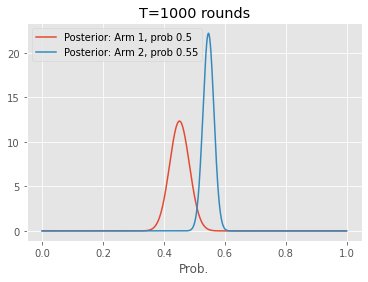

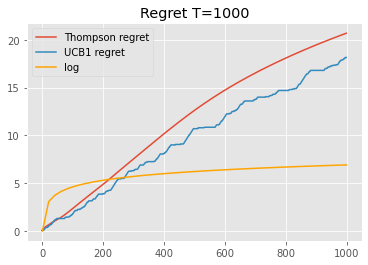

In [28]:
# Flat 1,1 priors, 1000 rounds
t_len=1000
arms = [0.5, 0.55]
prior=[1,1]
alpha,beta,c=Thompson(t_len,2,arms, prior)
regret=get_regret(arms, c, t_len)
plot_res(alpha,beta, t_len)
ucb_reg = genfromtxt('ucb1T1000.csv', delimiter=',').T[1][1:]
plot_reg(regret,ucb_reg, t_len)

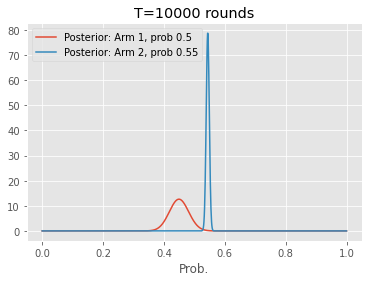

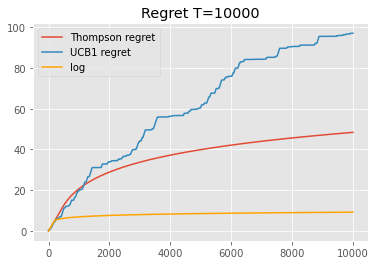

In [29]:
# Flat 1,1 priors, 10000 rounds
t_len=10000
arms = [0.5, 0.55]
prior=[1,1]
alpha,beta,c=Thompson(t_len,2,arms, prior)
regret=get_regret(arms, c, t_len)
ucb_reg = genfromtxt('ucb1T10000.csv', delimiter=',').T[1][1:]
plot_res(alpha,beta, t_len)

plot_reg(regret, ucb_reg,t_len)

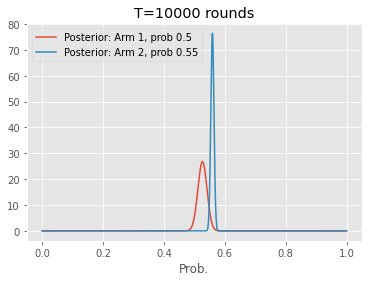

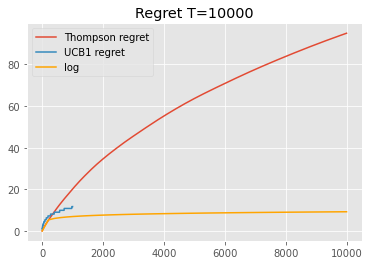

In [31]:
# Different 100,1 priors, 10000 rounds
t_len=10000
arms = [0.5, 0.55]
prior=[100,1]
alpha,beta,c=Thompson(t_len,2,arms, prior)
regret=get_regret(arms, c, t_len)
plot_res(alpha,beta, t_len)
plot_reg(regret, t_len)

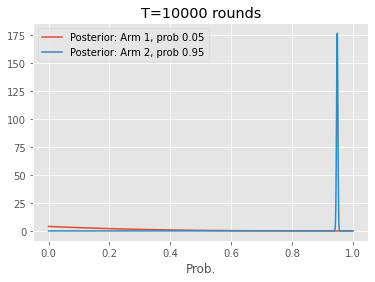

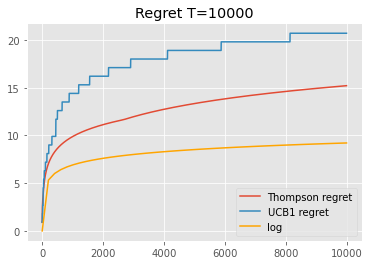

In [32]:
# Different 0.95 0.05 - T=10,000 - Flat Prior
t_len=10000
arms = [0.05, 0.95]
prior=[1,1]
alpha,beta,c=Thompson(t_len,2,arms, prior)
ucb_reg = genfromtxt('ucb1_new_T10000.csv', delimiter=',').T[1][1:]
regret=get_regret(arms, c, t_len)
plot_res(alpha,beta, t_len)
plot_reg(regret, ucb_reg, t_len)

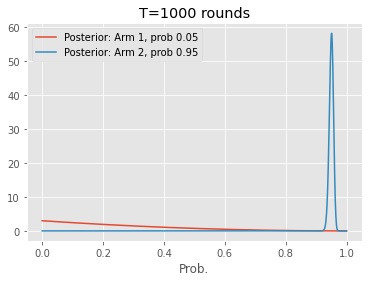

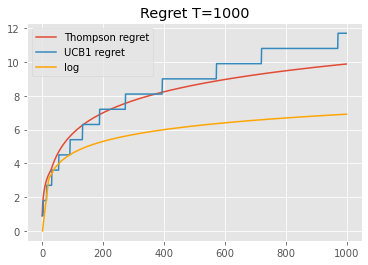

In [34]:
# Different 0.95 0.05 - T=1,000 - Flat Prior
t_len=1000
arms = [0.05, 0.95]
prior=[1,1]
alpha,beta,c=Thompson(t_len,2,arms, prior)
ucb_reg = genfromtxt('ucb1_new_T1000.csv', delimiter=',').T[1][1:]
regret=get_regret(arms, c, t_len)
plot_res(alpha,beta, t_len)
plot_reg(regret, ucb_reg, t_len)

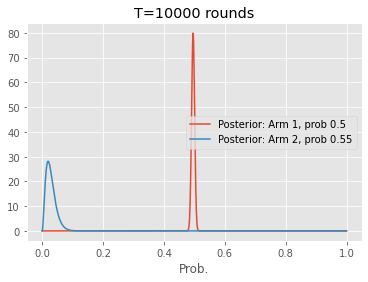

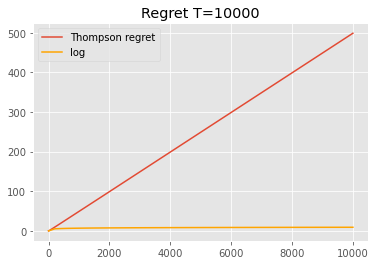

In [14]:
# Different 1,100 priors, 10000 rounds
t_len=10000
arms = [0.5, 0.55]
prior=[1,100]
alpha,beta,c=Thompson(t_len,2,arms, prior)
regret=get_regret(arms, c, t_len)
plot_res(alpha,beta, t_len)
plot_reg(regret, t_len)

In [59]:
ucb_dens = genfromtxt('ucb1t1000density.csv', delimiter=',')
ucb=ucb_dens.T[1][1:]

In [105]:
regrets=[]
for i in range(100):
    t_len=10000
    arms = [0.5, 0.55]
    prior=[1,1]
    alpha,beta,c=Thompson(t_len,2,arms, prior, seed=i)
    regret=get_regret(arms, c, t_len)
    print(i)
    regrets.append(np.cumsum(regret)[-1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Text(0.5, 1.0, 'T=1000')

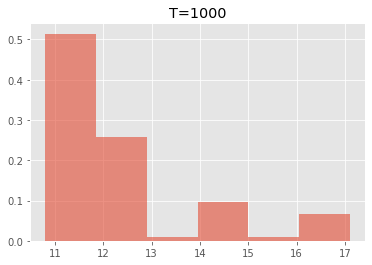

In [108]:
plt.hist(ucb, bins=6, density=True, alpha=0.6)
plt.title('T=1000')

Text(0.5, 1.0, 'T=10000')

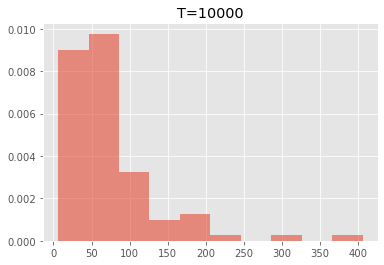

In [107]:

plt.hist(regrets,density=True, alpha=0.6)
plt.title('T=10000')

In [73]:
regrets

[29.460234682790755,
 12.936212497350883,
 8.82370918861902,
 13.083763939334663,
 14.544807586371961,
 20.688662576245935,
 10.855246398456009,
 40.49183943833665,
 11.856302455042696,
 34.95539406992736,
 9.254656766591934,
 6.433800982206817,
 19.516050237221318,
 24.25108866080619,
 9.058461612910847,
 7.14353396766529,
 8.406145441709992,
 15.692537240763748,
 24.497984944251872,
 23.121746974076473,
 16.209044292825936,
 5.06134075859538,
 34.04267546930623,
 30.440166320854317,
 24.58745877843112,
 5.041798791006398,
 11.060714426815533,
 10.232133212117079,
 25.418575040606708,
 19.445910344938103,
 6.1513041153197525,
 12.229682152414696,
 17.911267530561833,
 16.686881540900266,
 13.111141962848365,
 4.482193006659472,
 9.023549608807185,
 12.889127203700845,
 21.066996295350034,
 19.23622787299678,
 4.259361439730279,
 20.056709016720866,
 1.1383195476400865,
 31.465340674856417,
 7.454884615885821,
 42.66697417535619,
 5.698699327577079,
 4.692200871588096,
 26.427819737173